In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

In [4]:
uber_dataset = pd.read_csv(r'rideshare_kaggle.csv')
print(uber_dataset.shape)

(693071, 57)


In [5]:
uber_dataset.shape

(693071, 57)

In [6]:
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [7]:
uber_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [8]:
uber_dataset.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [9]:
#Finding the null Values in In column
uber_dataset.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

## STEP 2: Exploratory Data Analysis

### Distribution of Price Based on Cab Type
- **Black SUV** and **Lux Black XL** have the maximum cab fares.
- **Shared** and **UberPool** are the least expensive.
- The remaining cab types neither have the highest nor the lowest cab fares.

### Density Analysis
- Density of Ubers is higher than that of Lyfts.

### Conclusions/Assumptions
1. Customers might use **Black SUV** and **Lux Black XL** for long-distance travel.
2. The remaining cab types are primarily used for intra-city travel.
3. **UberPool** might be used for longer distances compared to **Shared**.
4. Ubers are generally used more than Lyfts.


Text(0, 0.5, 'Cab type')

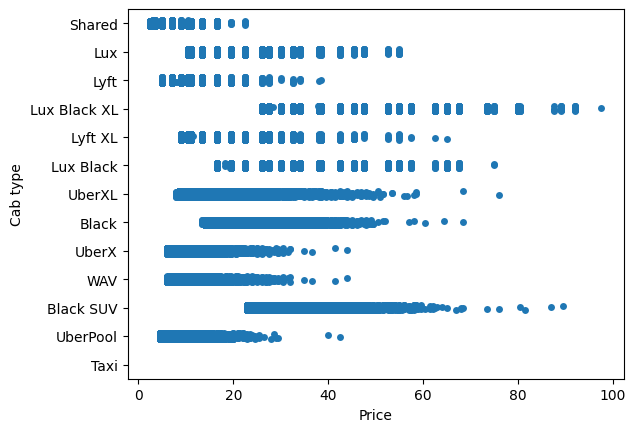

In [10]:
sns.stripplot(data=uber_dataset, x='price', y='name')
plt.xlabel('Price')
plt.ylabel('Cab type')

## Distribution of Price Based on Weather Conditions

### Observations
1. Price distribution is **highest on a clear night** compared to a clear day.
2. Price distribution is **higher on cloudy days** than rainy days.
3. Price distribution is **lower on rainy and foggy days**.
4. The density of prices is **high up to 60 USD**, after which it tapers off.

### Conclusions/Assumptions
1. Customers likely travel shorter distances on **rainy or foggy days**.
2. Customers tend to take cabs at night for **long-distance travel**, as traffic might be higher.
3. Customers generally travel **within the city**, regardless of weather conditions.
4. Some customers might travel long distances on **cloudy days/nights**, or the **wait time is higher** during such conditions.


Text(0, 0.5, 'Weather Conditions')

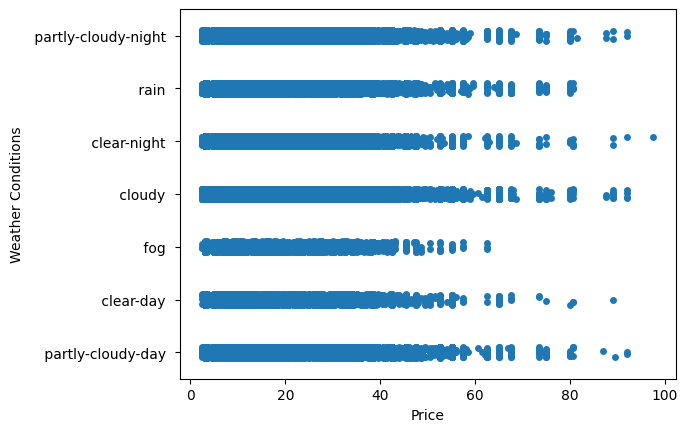

In [11]:
#strip plot to find the range of price based on weather conditiom 
sns.stripplot(data=uber_dataset, x='price', y='icon')
plt.xlabel('Price')
plt.ylabel('Weather Conditions')

Text(0, 0.5, 'distance')

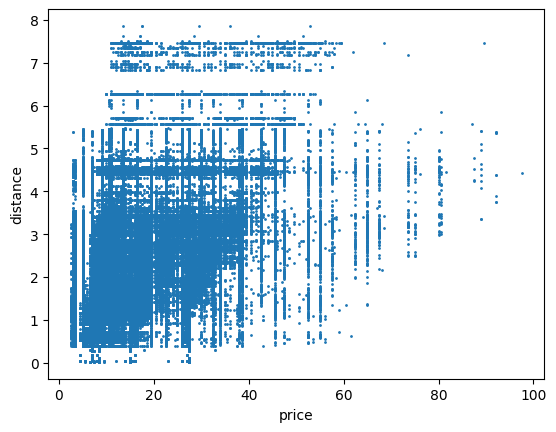

In [12]:
x=np.array(uber_dataset['price'])
y=np.array(uber_dataset['distance'])
plt.scatter(x,y,s=1)
plt.xlabel('price')
plt.ylabel('distance')

Text(0, 0.5, 'price')

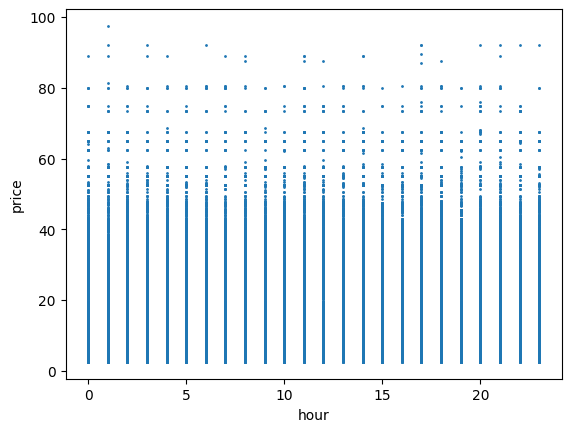

In [13]:
x=np.array(uber_dataset['hour'])
y=np.array(uber_dataset['price'])
plt.scatter(x,y,s=1)
plt.xlabel('hour')
plt.ylabel('price')

In [14]:
uber_dataset['timestamp'].head()

0    1.544953e+09
1    1.543284e+09
2    1.543367e+09
3    1.543554e+09
4    1.543463e+09
Name: timestamp, dtype: float64

In [15]:
from datetime import datetime
timestamp1 = 1544952608
timestamp2 = 1543284024
timestamp3 = 1543818483
timestamp4 = 1543594384
timestamp5 = 1544728504
dt_object1 = datetime.fromtimestamp(timestamp1)
dt_object2 = datetime.fromtimestamp(timestamp2)
dt_object3 = datetime.fromtimestamp(timestamp3)
dt_object4 = datetime.fromtimestamp(timestamp4)
dt_object5 = datetime.fromtimestamp(timestamp5)

print("dt_object =", dt_object1)
print("dt_object =", dt_object2)
print("dt_object =", dt_object3)
print("dt_object =", dt_object4)
print("dt_object =", dt_object5)

dt_object = 2018-12-16 01:30:08
dt_object = 2018-11-26 18:00:24
dt_object = 2018-12-02 22:28:03
dt_object = 2018-11-30 08:13:04
dt_object = 2018-12-13 11:15:04


Text(0, 0.5, 'Total count')

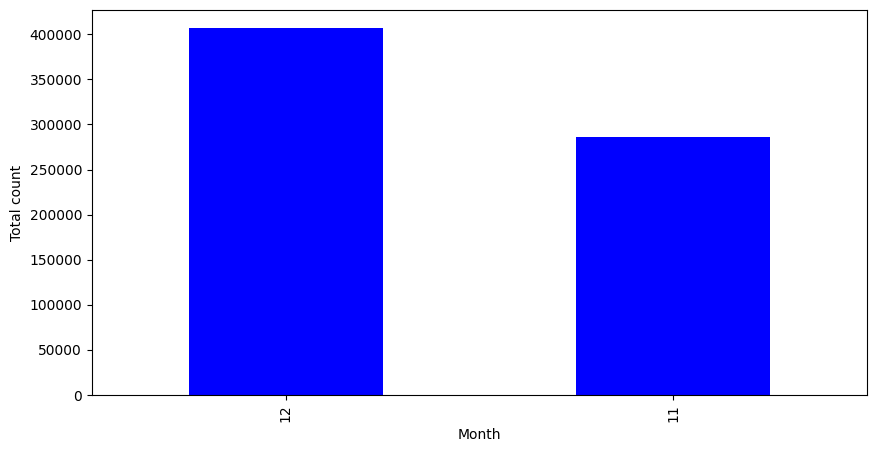

In [16]:
uber_dataset['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Month")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

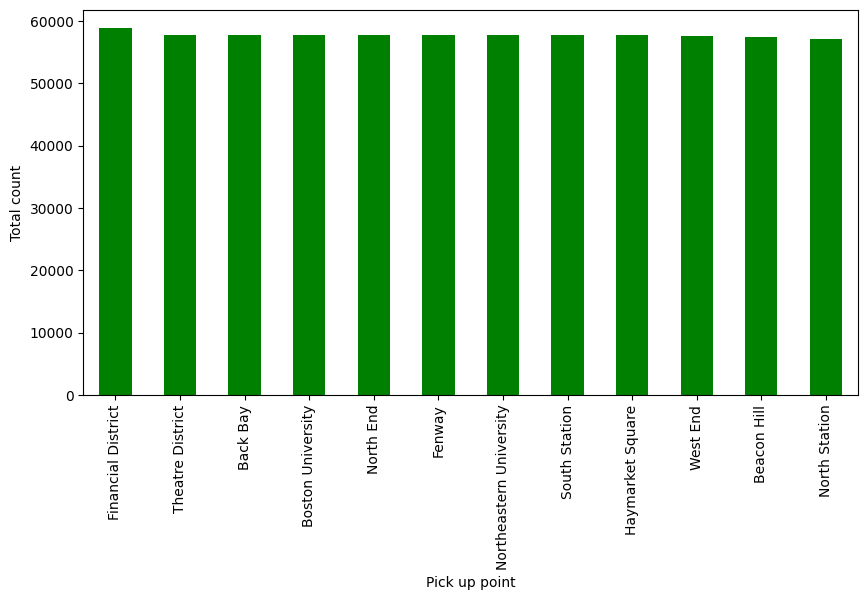

In [17]:
uber_dataset['source'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.xlabel("Pick up point")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

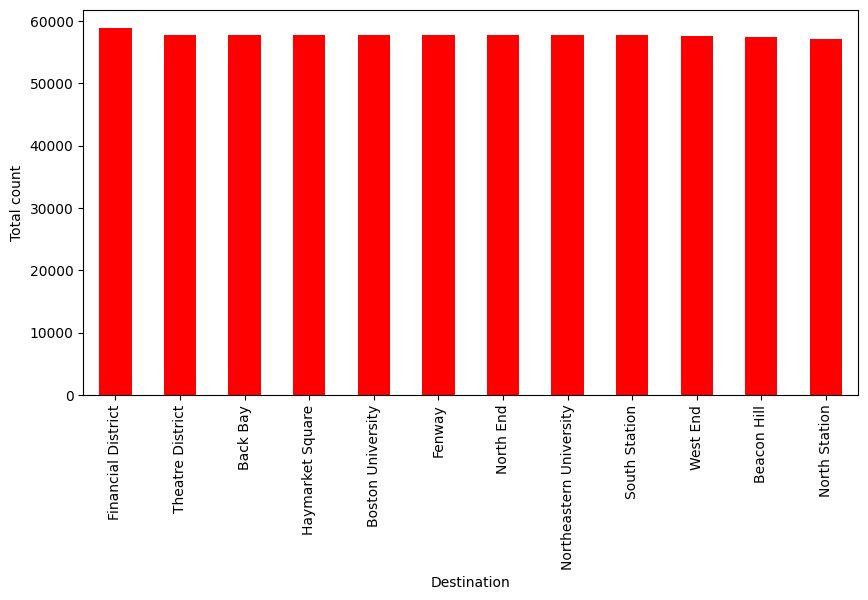

In [18]:
uber_dataset['destination'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Destination")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

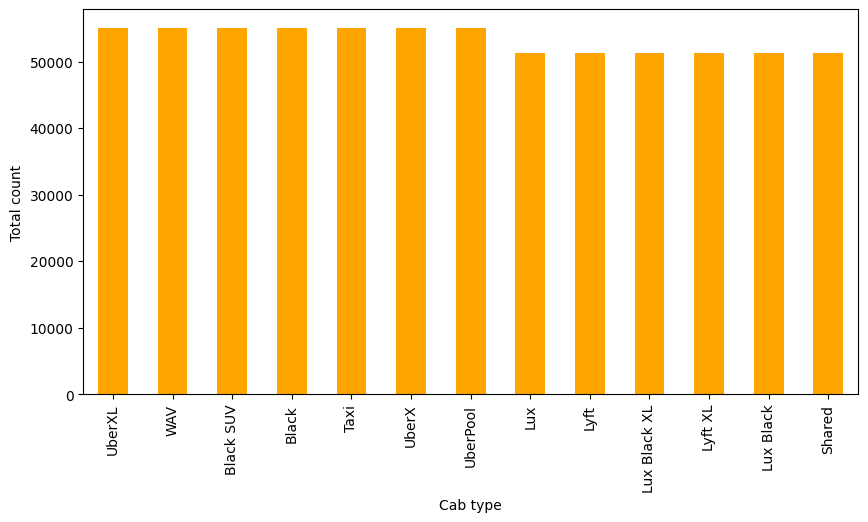

In [19]:
uber_dataset['name'].value_counts().plot(kind='bar', figsize=(10,5), color='orange')
plt.xlabel("Cab type")
plt.ylabel("Total count")

Text(0, 0.5, 'Total count')

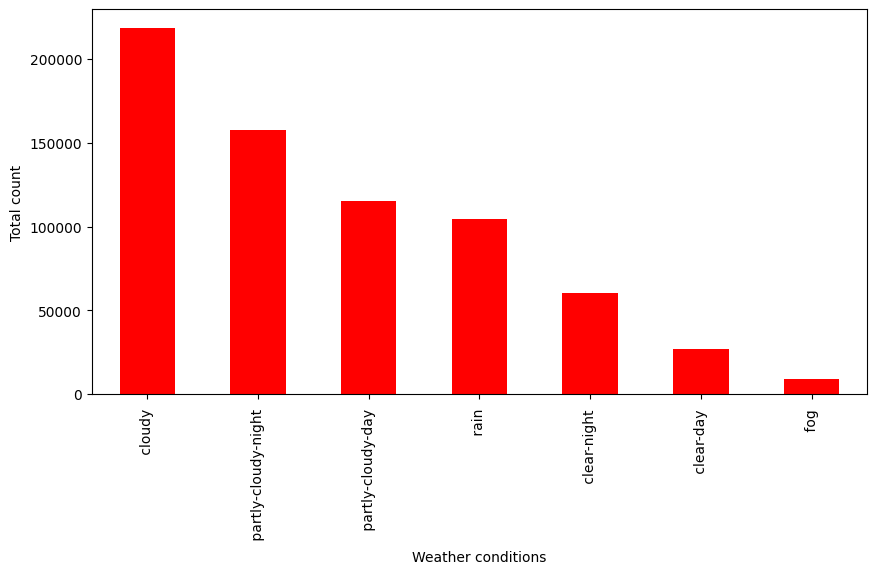

In [20]:
uber_dataset['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Weather conditions")
plt.ylabel("Total count")

In [21]:
uber_dataset['day-of-week'] = pd.to_datetime(uber_dataset['datetime']).dt.day_name()

Text(0, 0.5, 'Number of customers')

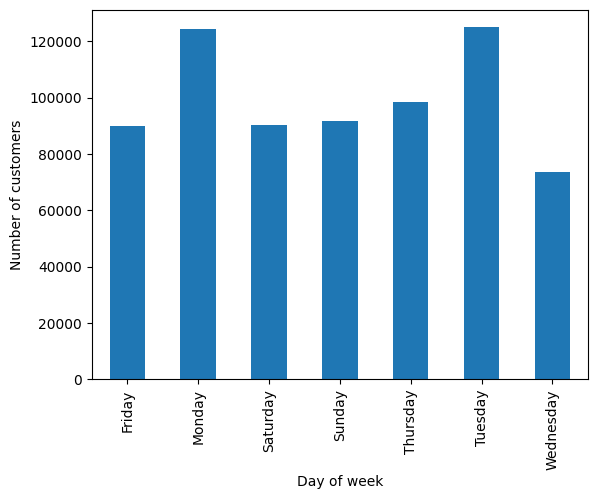

In [22]:
uber_dataset.groupby('day-of-week')['id'].count().plot(kind='bar')
plt.xlabel('Day of week')
plt.ylabel('Number of customers')

In [23]:
## rough work 
uber_dataset.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day-of-week
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,Thursday


In [24]:
from sklearn import preprocessing

In [25]:
columnNames = uber_dataset.columns
continuousColumns = []
for i in columnNames:
    if uber_dataset.dtypes[i] == 'float64':
        continuousColumns.append(i)
    else:
        pass
print(continuousColumns)
continuousColumns.remove('timestamp')
print(continuousColumns)

['timestamp', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']
['price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility', 'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover', 'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']


In [26]:
#Dataset for Normalization
uber_dataset_normal = uber_dataset[continuousColumns]

In [27]:
uber_dataset_normal.head()

,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,pressure,cloudCover,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,...,1021.98,0.72,10.000,303.8,0.30,0.1276,39.89,43.68,33.73,38.07
1,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,...,1003.97,1.00,4.786,291.1,0.64,0.1300,40.49,47.30,36.20,43.92
2,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,...,992.28,0.03,10.000,315.7,0.68,0.1064,35.36,47.55,31.04,44.12
3,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,...,1013.73,0.00,10.000,291.1,0.75,0.0000,34.67,45.03,30.30,38.53
4,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,...,998.36,0.44,10.000,347.7,0.72,0.0001,33.10,42.18,29.11,35.75


In [28]:
#Dataset for label encoding
uber_dataset_obj_features = uber_dataset.drop(continuousColumns,axis =1)

In [29]:
uber_dataset_obj_features.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,Sunday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,Tuesday
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,Wednesday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,Friday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,Thursday


In [30]:
names = uber_dataset_normal.columns
print(names)

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')


In [31]:
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(uber_dataset_normal)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head() # Normalized Dataset

,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,...,pressure,cloudCover,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,0.026316,0.053571,0.0,0.0,1.0,0.611590,0.554225,0.000000,0.0,0.517241,...,0.714075,0.72,1.000000,0.314155,0.250000,0.874572,0.883145,0.417488,0.776204,0.322832
1,0.089474,0.053571,0.0,0.0,1.0,0.643957,0.559326,0.897719,1.0,0.965517,...,0.334598,1.00,0.438328,0.198174,0.654762,0.891021,0.904987,0.566092,0.863669,0.529912
2,0.047368,0.053571,0.0,0.0,1.0,0.506917,0.461300,0.000000,0.0,0.637931,...,0.088285,0.03,1.000000,0.422831,0.702381,0.729267,0.718238,0.576355,0.680949,0.536991
3,0.247368,0.053571,0.0,0.0,1.0,0.403811,0.388113,0.000000,0.0,0.603448,...,0.540244,0.00,1.000000,0.198174,0.785714,0.000000,0.693120,0.472906,0.654745,0.339115
4,0.068421,0.053571,0.0,0.0,1.0,0.483686,0.415835,0.000000,0.0,0.551724,...,0.216393,0.44,1.000000,0.715068,0.750000,0.000685,0.635967,0.355911,0.612606,0.240708


In [32]:
# label_encoder object knows how to understand word labels. 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

In [33]:
uber_dataset_obj_features.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
short_summary                   object
long_summary                    object
windGustTime                     int64
temperatureHighTime              int64
temperatureLowTime               int64
apparentTemperatureHighTime      int64
apparentTemperatureLowTime       int64
icon                            object
windBearing                      int64
uvIndex                          int64
sunriseTime                      int64
sunsetTime                       int64
uvIndexTime                      int64
temperatureMinTime       

In [34]:
uber_dataset_obj_features['id']= label_encoder.fit_transform(uber_dataset_obj_features['id']) 
uber_dataset_obj_features['datetime']= label_encoder.fit_transform(uber_dataset_obj_features['datetime']) 
uber_dataset_obj_features['timezone']= label_encoder.fit_transform(uber_dataset_obj_features['timezone'])
uber_dataset_obj_features['destination']= label_encoder.fit_transform(uber_dataset_obj_features['destination']) 
uber_dataset_obj_features['product_id']= label_encoder.fit_transform(uber_dataset_obj_features['product_id'])
uber_dataset_obj_features['short_summary']= label_encoder.fit_transform(uber_dataset_obj_features['short_summary'])
uber_dataset_obj_features['long_summary']= label_encoder.fit_transform(uber_dataset_obj_features['long_summary'])
uber_dataset_obj_features['day-of-week']= label_encoder.fit_transform(uber_dataset_obj_features['day-of-week'])

In [35]:
uber_dataset_obj_features['cab_type'].unique()

array(['Lyft', 'Uber'], dtype=object)

In [36]:
uber_dataset_obj_features['cab_type']= label_encoder.fit_transform(uber_dataset_obj_features['cab_type'])

print("Class mapping of cab_type: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of cab_type: 
Lyft --> 0
Uber --> 1


In [37]:
uber_dataset_obj_features['name']= label_encoder.fit_transform(uber_dataset_obj_features['name'])

print("Class mapping of Name: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
Lux --> 2
Lux Black --> 3
Lux Black XL --> 4
Lyft --> 5
Lyft XL --> 6
Shared --> 7
Taxi --> 8
UberPool --> 9
UberX --> 10
UberXL --> 11
WAV --> 12


In [38]:
uber_dataset_obj_features['source']= label_encoder.fit_transform(uber_dataset_obj_features['source'])

print("Class mapping of Source: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [39]:
uber_dataset_obj_features['icon']= label_encoder.fit_transform(uber_dataset_obj_features['icon'])

print("Class mapping of Icon: ")
for i, item in enumerate(label_encoder.classes_):
    print(item, "-->", i)

Class mapping of Icon: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [40]:
# checking the data type after label encoding
uber_dataset_obj_features.dtypes

id                               int32
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                         int32
timezone                         int32
source                           int32
destination                      int32
cab_type                         int32
product_id                       int32
name                             int32
short_summary                    int32
long_summary                     int32
windGustTime                     int64
temperatureHighTime              int64
temperatureLowTime               int64
apparentTemperatureHighTime      int64
apparentTemperatureLowTime       int64
icon                             int32
windBearing                      int64
uvIndex                          int64
sunriseTime                      int64
sunsetTime                       int64
uvIndexTime                      int64
temperatureMinTime       

In [41]:
uber_dataset_obj_features.head()  #Encoded Dataset 

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,179271,1.544953e+09,9,16,12,25351,0,5,7,0,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,3
1,205021,1.543284e+09,2,27,11,961,0,5,7,0,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,5
2,411506,1.543367e+09,1,28,11,2534,0,5,7,0,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,6
3,527263,1.543554e+09,4,30,11,6988,0,5,7,0,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,0
4,606526,1.543463e+09,3,29,11,4400,0,5,7,0,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,4


In [42]:
uber_dataset = uber_dataset_normal.join(uber_dataset_obj_features)

In [43]:
uber_dataset['price']

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693066    13.0
693067     9.5
693068     NaN
693069    27.0
693070    10.0
Name: price, Length: 693071, dtype: float64

In [44]:
uber_dataset.columns

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust', 'visibility',
       'temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'dewPoint', 'pressure', 'cloudCover',
       'visibility.1', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax', 'id', 'timestamp', 'hour', 'day', 'month',
       'datetime', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'short_summary', 'long_summary', 'windGustTime',
       'temperatureHighTime', 'temperatureLowTime',
       'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'icon',
       'windBearing', 'uvIndex', 'sunriseTime', 'sunsetTime', 'uvIndexTime',
       'temperatureMinTime', 'temperatureMaxTime',
       'apparentTemperatureM

In [45]:
uber_dataset['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [46]:
surge_multiplier_mapping = {1.: 0, 1.25: 1, 1.5: 2, 1.75: 3, 2.:4, 2.5:5, 3.:6}
uber_dataset['surge_multiplier'] = uber_dataset['surge_multiplier'].map(surge_multiplier_mapping)

In [47]:
uber_dataset.isnull().sum()

price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
visibility                         0
temperatureHigh                    0
temperatureLow                     0
apparentTemperatureHigh            0
apparentTemperatureLow             0
dewPoint                           0
pressure                           0
cloudCover                         0
visibility.1                       0
ozone                              0
moonPhase                          0
precipIntensityMax                 0
temperatureMin                     0
temperatureMax                     0
apparentTemperatureMin             0
a

In [48]:
uber_dataset['price'].median()

13.5

In [49]:
uber_dataset["price"].fillna(13.5, inplace = True) 
import warnings
warnings.filterwarnings("ignore")

C:\Users\vishal\AppData\Local\Temp\ipykernel_26176\496379243.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_dataset["price"].fillna(13.5, inplace = True)


In [50]:
uber_dataset.isnull().sum()

price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
visibility                     0
temperatureHigh                0
temperatureLow                 0
apparentTemperatureHigh        0
apparentTemperatureLow         0
dewPoint                       0
pressure                       0
cloudCover                     0
visibility.1                   0
ozone                          0
moonPhase                      0
precipIntensityMax             0
temperatureMin                 0
temperatureMax                 0
apparentTemperatureMin         0
apparentTemperatureMax         0
id                             0
timestamp                      0
hour      

In [51]:
uber_dataset['price'].dtype

dtype('float64')

In [52]:
uber_dataset['price'] = uber_dataset['price'].astype(int)

In [53]:
uber_dataset['price'].head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [54]:
X = uber_dataset.drop('price', axis = 1)
y = uber_dataset['price']

In [55]:
X.head()

,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,0.44,0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,3
1,0.44,0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,5
2,0.44,0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,6
3,0.44,0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,0
4,0.44,0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,4


In [56]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [57]:
X.shape

(693071, 57)

In [58]:
y.shape

(693071,)

Text(0, 0.5, 'Total count')

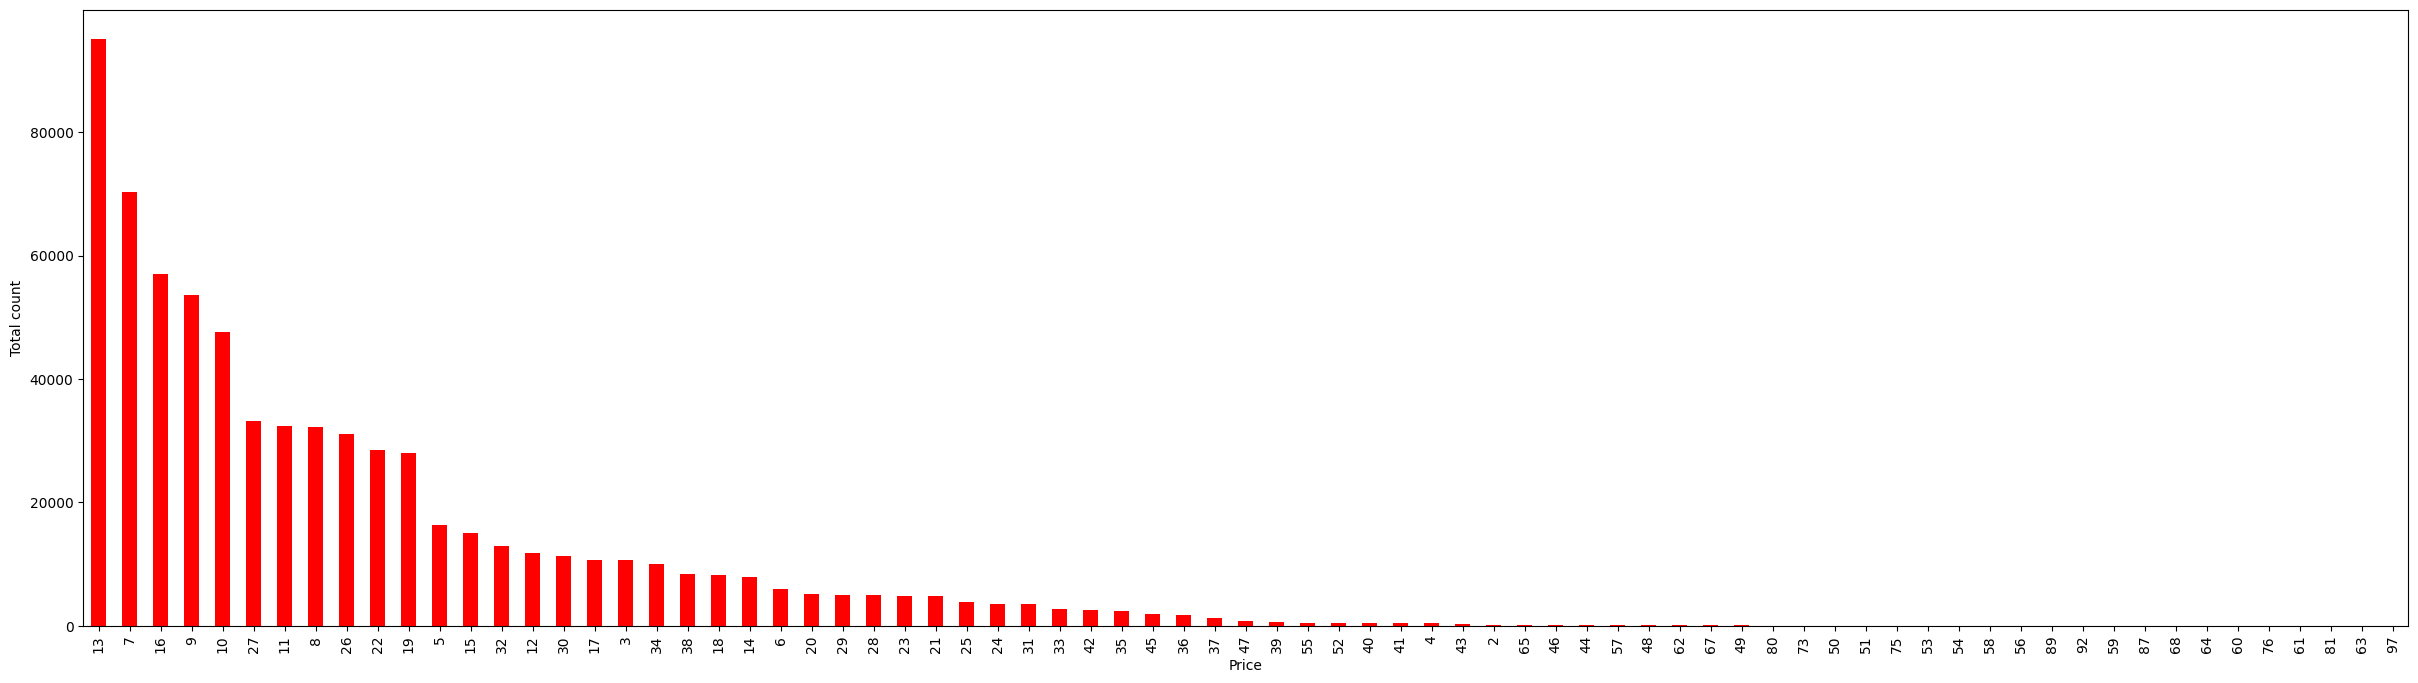

In [59]:
y.value_counts().plot(kind='bar',figsize=(30,8),color='red')
plt.xlabel("Price")
plt.ylabel("Total count")

In [60]:
breakpoint

<function breakpoint>

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [62]:
X_train.shape

(554456, 57)

In [63]:
X_test.shape

(138615, 57)

In [64]:
y_train.shape

(554456,)

In [65]:
y_test.shape

(138615,)

In [66]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)

Feature: 0, Score: 2.55669
Feature: 1, Score: 5.13461
Feature: 2, Score: 1.00017
Feature: 3, Score: 1.15865
Feature: 4, Score: -0.01015
Feature: 5, Score: 0.00302
Feature: 6, Score: -0.44246
Feature: 7, Score: -0.01040
Feature: 8, Score: -0.15044
Feature: 9, Score: -0.00884
Feature: 10, Score: 0.00533
Feature: 11, Score: -0.00155
Feature: 12, Score: -0.17282
Feature: 13, Score: -0.03111
Feature: 14, Score: 0.09782
Feature: 15, Score: 0.02252
Feature: 16, Score: 0.00467
Feature: 17, Score: -0.00036
Feature: 18, Score: 0.02636
Feature: 19, Score: -0.00155
Feature: 20, Score: -0.00131
Feature: 21, Score: 0.02643
Feature: 22, Score: -0.44830
Feature: 23, Score: -0.02517
Feature: 24, Score: 0.18028
Feature: 25, Score: 0.01865
Feature: 26, Score: -0.09875
Feature: 27, Score: 0.00000
Feature: 28, Score: -0.00001
Feature: 29, Score: 0.01936
Feature: 30, Score: 0.45864
Feature: 31, Score: 13.84267
Feature: 32, Score: 0.00001
Feature: 33, Score: -0.00000
Feature: 34, Score: 0.03336
Feature: 35, 

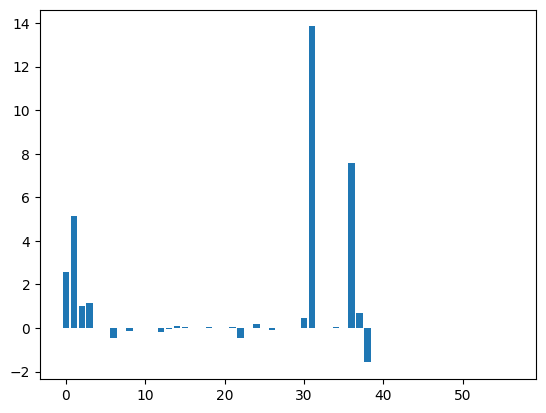

In [67]:
importance = reg.coef_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [68]:
print(X.columns[3])
print(X.columns[4])
print(X.columns[7])
print(X.columns[9])
print(X.columns[10])
print(X.columns[12])
print(X.columns[13])
print(X.columns[14])
print(X.columns[15])
print(X.columns[35])
print(X.columns[50])
print(X.columns[56])

longitude
temperature
precipProbability
windSpeed
windGust
temperatureHigh
temperatureLow
apparentTemperatureHigh
apparentTemperatureLow
destination
sunsetTime
day-of-week


In [69]:
rfe = RFE(reg,n_features_to_select=56, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.


In [70]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [71]:
XX = X[X.columns[rfe.support_]]

In [72]:
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,windBearing,uvIndex,sunriseTime,sunsetTime,uvIndexTime,temperatureMinTime,temperatureMaxTime,apparentTemperatureMinTime,apparentTemperatureMaxTime,day-of-week
0,0.44,0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,...,57,0,1544962084,1544994864,1544979600,1545012000,1544968800,1545012000,1544958000,3
1,0.44,0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,...,90,0,1543232969,1543266992,1543251600,1543233600,1543251600,1543291200,1543251600,5
2,0.44,0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,...,240,0,1543319437,1543353364,1543338000,1543377600,1543320000,1543377600,1543320000,6
3,0.44,0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,...,310,0,1543492370,1543526114,1543507200,1543550400,1543510800,1543550400,1543510800,0
4,0.44,0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,...,303,0,1543405904,1543439738,1543420800,1543402800,1543420800,1543392000,1543420800,4


In [73]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [74]:
X_train.shape

(485149, 56)

In [75]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [76]:
reg1.score(X_train, y_train)

0.5264086776246115

In [77]:
rfe = RFE(reg,n_features_to_select= 40,step=1)
rfe = rfe.fit(X, y)

In [78]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False,  True])

In [79]:
XX = X[X.columns[rfe.support_]]

In [80]:
#Final Dateset after preprocessing 
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,...,source,destination,cab_type,product_id,name,short_summary,long_summary,icon,uvIndex,day-of-week
0,0.44,0,42.2148,-71.033,42.34,37.12,0.0000,0.0,0.68,8.66,...,5,7,0,8,7,4,9,5,0,3
1,0.44,0,42.2148,-71.033,43.58,37.35,0.1299,1.0,0.94,11.98,...,5,7,0,12,2,8,10,6,0,5
2,0.44,0,42.2148,-71.033,38.33,32.93,0.0000,0.0,0.75,7.33,...,5,7,0,7,5,0,2,1,0,6
3,0.44,0,42.2148,-71.033,34.38,29.63,0.0000,0.0,0.73,5.28,...,5,7,0,10,4,0,6,1,0,0
4,0.44,0,42.2148,-71.033,37.44,30.88,0.0000,0.0,0.70,9.14,...,5,7,0,11,6,6,4,5,0,4


In [81]:
#Splitting the final data set into test and train
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10)

In [82]:
X_train.shape

(485149, 40)

In [83]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [84]:
reg1.score(X_train, y_train)

0.5263963037159965

In [85]:
rfe = RFE(reg,n_features_to_select=15, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [86]:
XX = X[X.columns[rfe.support_]]

In [87]:
XX.head()

,distance,surge_multiplier,latitude,longitude,precipIntensity,visibility,temperatureHigh,apparentTemperatureHigh,visibility.1,temperatureMax,apparentTemperatureMax,source,cab_type,product_id,name
0,0.44,0,42.2148,-71.033,0.0000,10.000,43.68,37.95,10.000,43.68,38.07,5,0,8,7
1,0.44,0,42.2148,-71.033,0.1299,4.786,47.30,43.92,4.786,47.30,43.92,5,0,12,2
2,0.44,0,42.2148,-71.033,0.0000,10.000,47.55,44.12,10.000,47.55,44.12,5,0,7,5
3,0.44,0,42.2148,-71.033,0.0000,10.000,45.03,38.53,10.000,45.03,38.53,5,0,10,4
4,0.44,0,42.2148,-71.033,0.0000,10.000,42.18,35.75,10.000,42.18,35.75,5,0,11,6


In [88]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 10,)

In [89]:
X_train.shape

(485149, 15)

In [90]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)

In [91]:
reg1.score(X_train, y_train)

0.5263691497804139

In [92]:
rfe = RFE(reg, n_features_to_select=25, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

In [93]:
XX = X[X.columns[rfe.support_]]

In [94]:
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,humidity,visibility,temperatureHigh,temperatureLow,...,precipIntensityMax,temperatureMax,apparentTemperatureMax,month,source,destination,cab_type,product_id,name,uvIndex
0,0.44,0,42.2148,-71.033,42.34,0.0000,0.68,10.000,43.68,34.19,...,0.1276,43.68,38.07,12,5,7,0,8,7,0
1,0.44,0,42.2148,-71.033,43.58,0.1299,0.94,4.786,47.30,42.10,...,0.1300,47.30,43.92,11,5,7,0,12,2,0
2,0.44,0,42.2148,-71.033,38.33,0.0000,0.75,10.000,47.55,33.10,...,0.1064,47.55,44.12,11,5,7,0,7,5,0
3,0.44,0,42.2148,-71.033,34.38,0.0000,0.73,10.000,45.03,28.90,...,0.0000,45.03,38.53,11,5,7,0,10,4,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,0.70,10.000,42.18,36.71,...,0.0001,42.18,35.75,11,5,7,0,11,6,0


In [95]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.3, random_state = 20,)

In [96]:
X_train.shape

(485149, 25)

In [97]:
#Creating model
reg1 = LinearRegression()
#Fitting training data
reg1 = reg1.fit(X_train, y_train)
#Y prediction
Y_pred = reg1.predict(X_test)

In [98]:
reg1.score(X_train, y_train)

0.5262101305132261

In [99]:
XX.columns

Index(['distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'precipIntensity', 'humidity', 'visibility', 'temperatureHigh',
       'temperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'cloudCover',
       'visibility.1', 'moonPhase', 'precipIntensityMax', 'temperatureMax',
       'apparentTemperatureMax', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'uvIndex'],
      dtype='object')

In [100]:
XX.shape

(693071, 25)

In [101]:
XX.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,humidity,visibility,temperatureHigh,temperatureLow,...,precipIntensityMax,temperatureMax,apparentTemperatureMax,month,source,destination,cab_type,product_id,name,uvIndex
0,0.44,0,42.2148,-71.033,42.34,0.0000,0.68,10.000,43.68,34.19,...,0.1276,43.68,38.07,12,5,7,0,8,7,0
1,0.44,0,42.2148,-71.033,43.58,0.1299,0.94,4.786,47.30,42.10,...,0.1300,47.30,43.92,11,5,7,0,12,2,0
2,0.44,0,42.2148,-71.033,38.33,0.0000,0.75,10.000,47.55,33.10,...,0.1064,47.55,44.12,11,5,7,0,7,5,0
3,0.44,0,42.2148,-71.033,34.38,0.0000,0.73,10.000,45.03,28.90,...,0.0000,45.03,38.53,11,5,7,0,10,4,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,0.70,10.000,42.18,36.71,...,0.0001,42.18,35.75,11,5,7,0,11,6,0


In [102]:
features_drop = [ 'humidity', 'temperatureHigh', 'apparentTemperatureHigh', 'dewPoint', 'temperatureMax',
       'apparentTemperatureMax']
new_uber = XX.drop(features_drop, axis=1)

In [103]:
new_uber.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,visibility,temperatureLow,cloudCover,visibility.1,moonPhase,precipIntensityMax,month,source,destination,cab_type,product_id,name,uvIndex
0,0.44,0,42.2148,-71.033,42.34,0.0000,10.000,34.19,0.72,10.000,0.30,0.1276,12,5,7,0,8,7,0
1,0.44,0,42.2148,-71.033,43.58,0.1299,4.786,42.10,1.00,4.786,0.64,0.1300,11,5,7,0,12,2,0
2,0.44,0,42.2148,-71.033,38.33,0.0000,10.000,33.10,0.03,10.000,0.68,0.1064,11,5,7,0,7,5,0
3,0.44,0,42.2148,-71.033,34.38,0.0000,10.000,28.90,0.00,10.000,0.75,0.0000,11,5,7,0,10,4,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,10.000,36.71,0.44,10.000,0.72,0.0001,11,5,7,0,11,6,0


In [104]:
new_uber.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,visibility,temperatureLow,cloudCover,visibility.1,moonPhase,precipIntensityMax,month,source,destination,cab_type,product_id,name,uvIndex
0,0.44,0,42.2148,-71.033,42.34,0.0000,10.000,34.19,0.72,10.000,0.30,0.1276,12,5,7,0,8,7,0
1,0.44,0,42.2148,-71.033,43.58,0.1299,4.786,42.10,1.00,4.786,0.64,0.1300,11,5,7,0,12,2,0
2,0.44,0,42.2148,-71.033,38.33,0.0000,10.000,33.10,0.03,10.000,0.68,0.1064,11,5,7,0,7,5,0
3,0.44,0,42.2148,-71.033,34.38,0.0000,10.000,28.90,0.00,10.000,0.75,0.0000,11,5,7,0,10,4,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,10.000,36.71,0.44,10.000,0.72,0.0001,11,5,7,0,11,6,0


In [105]:
new_uber.fillna(0, inplace=True)

In [106]:
y.head()

0     5
1    11
2     7
3    26
4     9
Name: price, dtype: int32

In [107]:
new_uber.shape

(693071, 19)

In [108]:
y.shape

(693071,)

In [109]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xx_train, xx_test, yy_train, yy_test = train_test_split(new_uber, y, test_size = 0.2, random_state = 42)

In [110]:
xx_train.shape

(554456, 19)

In [111]:
xx_test.shape

(138615, 19)

In [112]:
yy_train.shape

(554456,)

In [113]:
yy_test.shape

(138615,)

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 

In [115]:
new_uber.fillna(X_train.mean(), inplace=True)

Linear regression

In [116]:
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

In [117]:
linear = LinearRegression(fit_intercept=True,copy_X=True, n_jobs=None)

In [118]:
linear.fit(xx_train, yy_train)

LinearRegression()

In [119]:
print('linear_score : ',linear.score(xx_test, yy_test))
linear_score=linear.score(xx_test, yy_test)

linear_score :  0.5249799095394938


In [120]:
prediction = linear.predict(xx_test)
prediction=  prediction.astype(int)

Text(0, 0.5, 'Predicted Y')

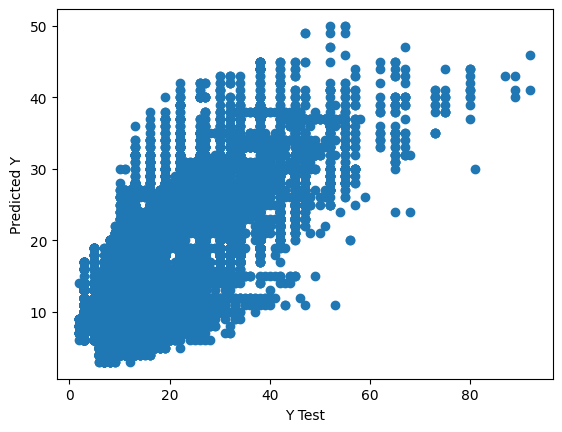

In [121]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [122]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))


MAE :   4.786567110341593
MSE :   38.454135555315084
RMSE :   6.20113985935772


In [123]:
linear_score=linear.score(xx_test, yy_test)
linear_MAE=metrics.mean_absolute_error(yy_test,prediction)
linear_MSE= metrics.mean_squared_error(yy_test,prediction)
linear_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

<Axes: xlabel='price', ylabel='Density'>

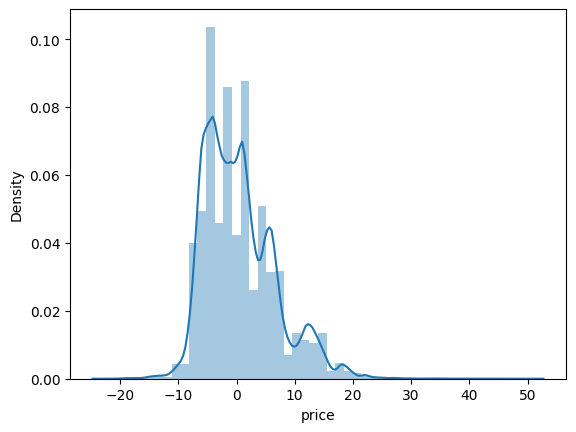

In [124]:
sns.distplot(yy_test - prediction,bins=50)

In [125]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),xx_test,yy_test,cv=cv)

array([0.52807832, 0.52811235, 0.52444419, 0.5221935 , 0.52054847])

Conclusion -

Linear regression is not a good model for this data since this data is not linear. This data is too complex for a linear model.

The remaining ML Models are more robust for this data. These models learns the variety of data better.

Decision Tree

In [126]:
decision = DecisionTreeRegressor(random_state = 0, max_depth=12)

In [127]:
decision.fit(xx_train , yy_train)

DecisionTreeRegressor(max_depth=12, random_state=0)

In [128]:
print('Decision_tree_score :',decision.score(xx_test, yy_test))

Decision_tree_score : 0.9650298689625623


In [129]:
prediction=decision.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

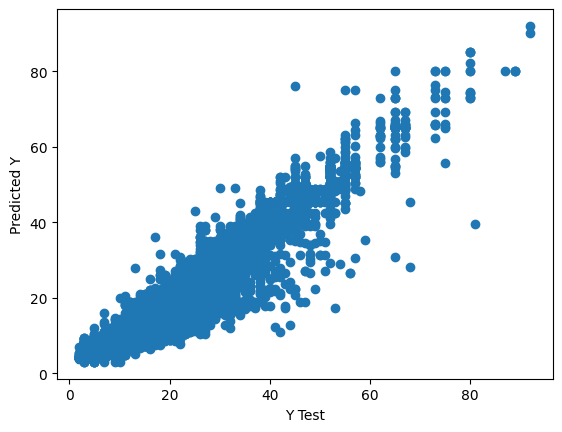

In [130]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [131]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0186950389404892
MSE :   2.805695867461424
RMSE :   1.6750211543325129


In [132]:
decision_score=decision.score(xx_test, yy_test)
decision_MAE=metrics.mean_absolute_error(yy_test,prediction)
decision_MSE= metrics.mean_squared_error(yy_test,prediction)
decision_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

<Axes: xlabel='price', ylabel='Density'>

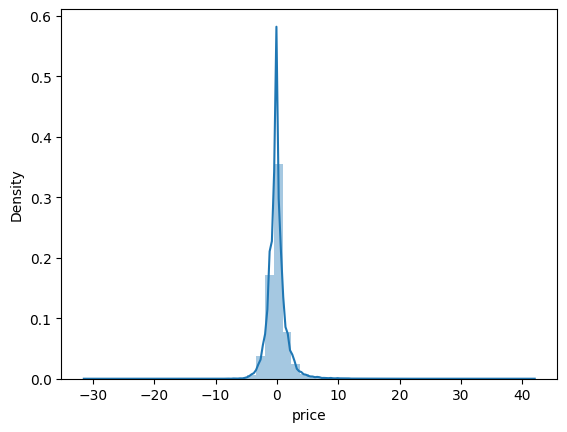

In [133]:
sns.distplot(yy_test - prediction,bins=50)

In [134]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),xx_test,yy_test,cv=cv)

array([0.92987729, 0.93397721, 0.93528711, 0.93360994, 0.92816465])

Random forest

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)
g_search.fit(xx_train, yy_train)

##print(g_search.best_params_)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True)

In [136]:
random = RandomForestRegressor(n_estimators = 100, random_state = 0) 

In [137]:
random.fit(xx_train , yy_train)

RandomForestRegressor(random_state=0)

In [138]:
print('Random_forest_score :',random.score(xx_test, yy_test))
random_score=random.score(xx_test, yy_test)

Random_forest_score : 0.9614824422821191


In [139]:
prediction = random.predict(xx_test)

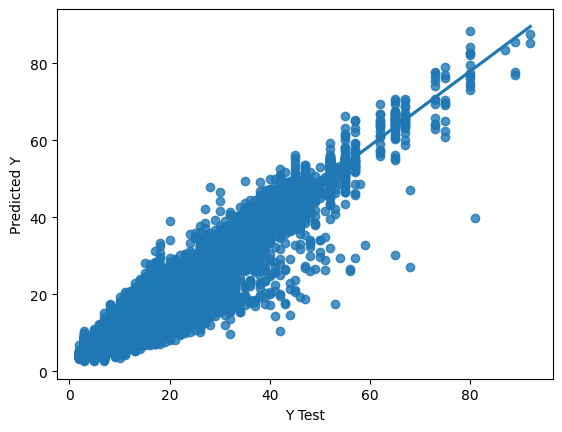

In [140]:
sns.regplot(x=yy_test, y=prediction)  # Use keyword arguments for x and y
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


In [141]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0617197488921344
MSE :   3.090310196380761
RMAE :   1.7579278131882325


In [142]:
random_score=random.score(xx_test, yy_test)
random_MAE=metrics.mean_absolute_error(yy_test,prediction)
random_MSE=metrics.mean_squared_error(yy_test,prediction)
random_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

<Axes: xlabel='price', ylabel='Density'>

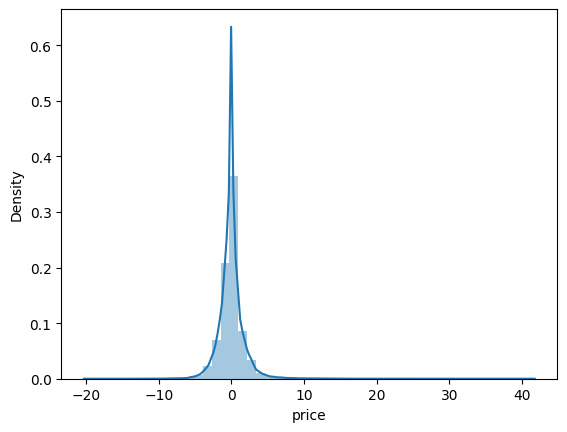

In [143]:
sns.distplot(yy_test - prediction,bins=50)

In [144]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(RandomForestRegressor(),xx_test,yy_test,cv=cv)

array([0.95915075, 0.96164966, 0.96188041, 0.96144877, 0.95832082])

Gradient Boosting Regressor

In [145]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5)

In [146]:
clf.fit(xx_train, yy_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [147]:
print('Grdient_Boosting_Regressor_score :',clf.score(xx_test, yy_test))

Grdient_Boosting_Regressor_score : 0.9678546856409288


In [148]:
prediction=clf.predict(xx_test)

Text(0, 0.5, 'Predicted Y')

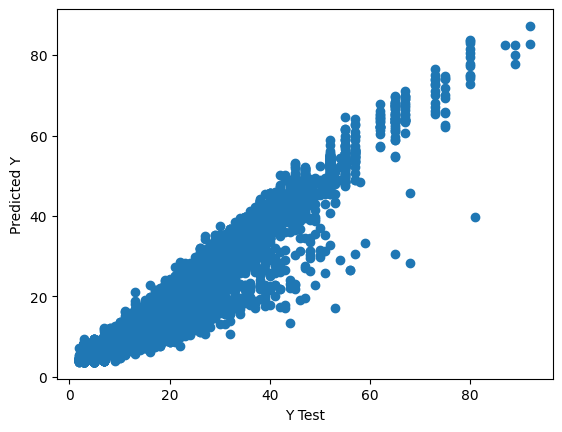

In [149]:
plt.scatter(yy_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [151]:
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(yy_test,prediction))
print('MSE :'," ", metrics.mean_squared_error(yy_test,prediction))
print('RMSE :'," ", np.sqrt(metrics.mean_squared_error(yy_test,prediction)))

MAE :   1.0132343235814405
MSE :   2.579057412136668
RMSE :   1.6059443988310018


In [152]:
Gradient_score=clf.score(xx_test, yy_test)
Gradient_MAE=metrics.mean_absolute_error(yy_test,prediction)
Gradient_MSE=metrics.mean_squared_error(yy_test,prediction)
Gradient_RMAE=np.sqrt(metrics.mean_squared_error(yy_test,prediction))

<Axes: xlabel='price', ylabel='Density'>

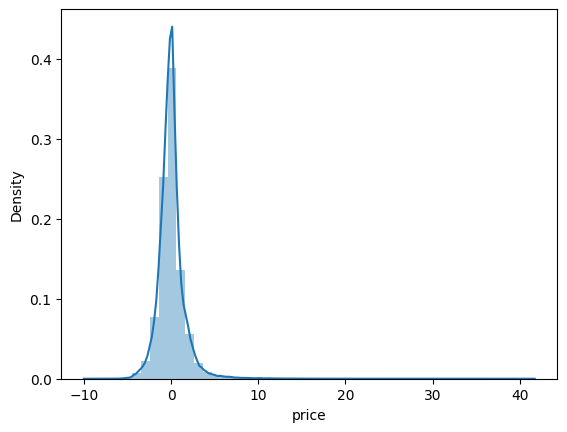

In [153]:
sns.distplot(yy_test - prediction,bins=50)

In [154]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(clf,xx_test,yy_test,cv=cv)

array([0.96514183, 0.9675341 , 0.96757268, 0.96691073, 0.96480204])

Price prediction function

In [155]:
new_uber.head()

,distance,surge_multiplier,latitude,longitude,temperature,precipIntensity,visibility,temperatureLow,cloudCover,visibility.1,moonPhase,precipIntensityMax,month,source,destination,cab_type,product_id,name,uvIndex
0,0.44,0,42.2148,-71.033,42.34,0.0000,10.000,34.19,0.72,10.000,0.30,0.1276,12,5,7,0,8,7,0
1,0.44,0,42.2148,-71.033,43.58,0.1299,4.786,42.10,1.00,4.786,0.64,0.1300,11,5,7,0,12,2,0
2,0.44,0,42.2148,-71.033,38.33,0.0000,10.000,33.10,0.03,10.000,0.68,0.1064,11,5,7,0,7,5,0
3,0.44,0,42.2148,-71.033,34.38,0.0000,10.000,28.90,0.00,10.000,0.75,0.0000,11,5,7,0,10,4,0
4,0.44,0,42.2148,-71.033,37.44,0.0000,10.000,36.71,0.44,10.000,0.72,0.0001,11,5,7,0,11,6,0


In [156]:
def predict_price(name,source,surge_multiplier,icon):    
    loc_index = np.where(new_uber.columns==name)[0]

    x = np.zeros(len(new_uber.columns))
    x[0] = source
    x[1] = surge_multiplier
    x[2] = icon
    if loc_index >= 0:
        x[loc_index] = 1

    return random.predict([x])[0]

In [157]:
pre= random.predict(xx_test)

Follow these instructions before predicting the price:
For cab_name: Black SUV --> 0 , Lux --> 1 , Shared --> 2 , Taxi --> 3 , UberPool --> 4 , UberX --> 5

For Source: Back Bay --> 0 , Beacon Hill --> 1 , Boston University --> 2 , Fenway --> 3 , Financial District --> 4 , Haymarket Square --> 5 , North End --> 6 , North Station --> 7 , Northeastern University --> 8 , South Station --> 9 , Theatre District --> 10 , West End --> 11

For Surge_multiplier : Enter Surge Multiplier value from 0 to 4

for Icon: clear-day --> 0 , clear-night --> 1 , cloudy --> 2 , fog --> 3 , partly-cloudy-day --> 4 , partly-cloudy-night --> 5 , rain --> 6

predict_price(cab_name , source , surge_multiplier , icon)

In [158]:
predict_price(2 , 3, 2, 5)

26.0725

Result

Text(0.5, 0, 'algorithm')

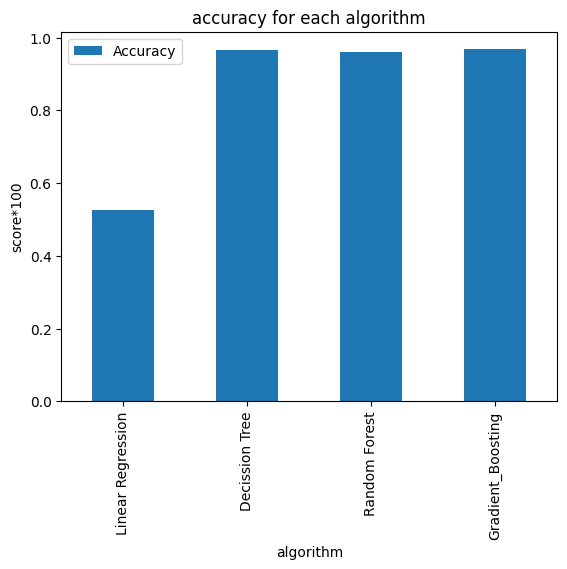

In [159]:
l1=['Linear Regression',linear_score]
l2=['Decission Tree',decision_score]
l3=['Random Forest',random_score]
l4=['Gradient_Boosting',Gradient_score]
cols=['Algo','Accuracy']
df= pd.DataFrame([list(l1),list(l2),list(l3),list(l4)],columns=cols)
df.set_index('Algo').plot(kind='bar')
plt.title("accuracy for each algorithm")
plt.ylabel("score*100")
plt.xlabel("algorithm")

In [160]:
l1=['Linear Regression',linear_MAE,linear_MSE,linear_RMAE]
l2=['Decission Tree',decision_MAE,decision_MSE,decision_RMAE]
l3=['Random Forest',random_MAE,random_MSE,random_RMAE]
l4=['Gradient_Boosting',Gradient_MAE,Gradient_MSE,Gradient_RMAE]
cols=['Algo','MAE','MSE','RMSE']

In [161]:
df= pd.DataFrame([list(l1),list(l2),list(l3),list(l4)],columns=cols)

In [162]:
df

,Algo,MAE,MSE,RMSE
0,Linear Regression,4.786567,38.454136,6.201140
1,Decission Tree,1.018695,2.805696,1.675021
2,Random Forest,1.061720,3.090310,1.757928
3,Gradient_Boosting,1.013234,2.579057,1.605944


Text(0, 0.5, 'algorithm')

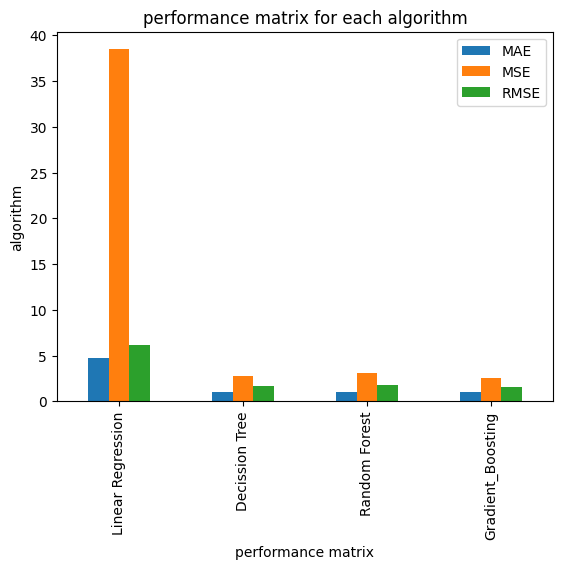

In [163]:
df.set_index('Algo').plot(kind='bar')
plt.title("performance matrix for each algorithm")
plt.xlabel("performance matrix")
plt.ylabel("algorithm")